Offseting a spline
==================

By: Bryce DeAlessio

In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
x = np.linspace(0, 2*np.pi, 33)
y = np.sin(x)

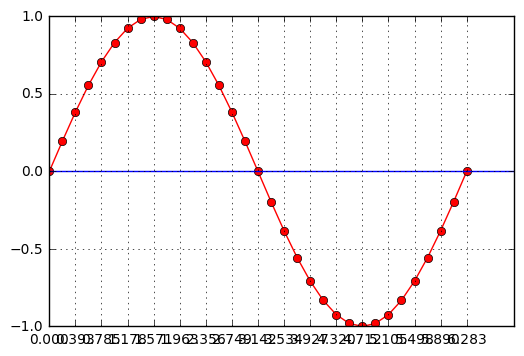

In [13]:
ax = plt.plot(x,y, 'ro-')
ax = plt.gca()
ax.axhline()
ax.grid()
x_ticks = ax.set_xticks(np.linspace(0,2*np.pi,17))
plt.show()

In [4]:
bspline = UnivariateSpline(x,y)
slopes = bspline.derivative()(x)
normals = -1/slopes

In [5]:
#y = mx+b
offset = .3
xo = offset * 1.0 / np.sqrt((1.0 + normals**2)) + x
yo = offset * (normals / np.sqrt(1.0 + normals**2)) + y

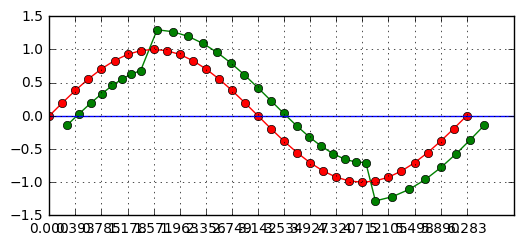

In [17]:
plt.plot(xo,yo, 'go-')
plt.plot(x,y, 'ro-')
ax = plt.gca()
ax.set_aspect('equal')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAgwAAAD1CAYAAAA8hK33AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXl4VEXWh9/bEGQxyKYsIdABxAkZN0QkgooDCaAkqFEYFQR1RhRDHBBw/GAIKqgooHGIIwiOGyAqIgmyyKKAGHEILgMGhkgCyCaLkiYRDOnz/dFJ6O70mvS93WnqfZ77EO72q7pV3fd01alzNBFBoVAoFAqFwhOmYBdAoVAoFApF6KMMBoVCoVAoFF5RBoNCoVAoFAqvKINBoVAoFAqFV5TBoFAoFAqFwivKYFAoFAqFQuEVZTAoFAqFQqHwijIYFAqFQqFQeEUZDAqFQqFQKLyiDAaFQqFQKBRe0dVg0DTtBk3TsjRNO6BpmlXTtGQv599Ufp79VqZp2iV6llOhUCgUCoVn9B5haAR8C4wCfE1aIcClQKvyrbWI/KxP8RQKhUKhUPhCXT1vLiKrgFUAmqZpflx6VESK9CmVQqFQKBQKfwlFHwYN+FbTtIOapn2qadr1wS6QQqFQKBTnO7qOMFSDQ8BIYCtwAfBX4HNN07qLyLeuLtA0rTnQDygEThtUToVCoVAowoH6gBlYLSLHPZ0YUgaDiPwP+J/drq80TesIjAGGu7msH7BA77IpFAqFQhHG3Ass9HRCSBkMbvga6OnheCHAu+++S2xsrK4FGTNmDC+99JKuGkbqGKmldJSO0lE6wdAKN51Ak5eXx9ChQ6H8XeqJ2mAwXIVtqsIdpwFiY2Pp2rWrrgW56KKLdNcwUsdILaWjdJSO0gmGVrjp6IjXKX1dDQZN0xoBnbA5MgJ00DTtSuCEiOzXNO05oI2IDC8//zGgANiBbV7lr8DNQIKe5fSVEydOhJWOkVpKR+koHaUTDK1w0wkmeo8wdAM+wxZbQYCZ5fvfAh7AFmch2u78euXntAFKgO+BPiKyUedy+kR+fn5Y6RippXSUjtJROsHQCjedYKJ3HIYNeFi6KSL3O/3/ReBFPctUE6655pqw0jFSS+koHaWjdIKhFW46wSQU4zCELOWOIWGjY6SW0lE6SkfpBEMr3HSCiSbia8Tm0ETTtK5Abm5ubm13OFEoFAqFwlC2bdtWMTpyjYhs83SuGmFQKBQKhULhFWUw+MH48ePDSsdILXsdPUe1wq2NlI7SCUcdI7XCTSeYKIPBD9q1axdWOkZqXXLJJaRNSCOmawzR3aOJ6RpD2oQ0LBZLQHXCrY2UjtIJRx0jtcJNJ5goHwaF7lgsFuIT48nrlIe1o9UWlUPAtMdE7O5Ycj7NITIy0uf7iQj+JT9VKBQKhSuUD4MipJj4zESbsdDJei6ElwbWjlbyOuUxaeokr/ewWCyGjFAoFAqFwjW1ITS0opaTvTYba7LV5TFrRysLPlzAgL8OwNzETPuL2tMgooHDOQ4jFMnnRigy92SyPnG93yMUCoVCofAfNcLgBzt37gwrHSO0RITSOqVwzM0JGhw/e5wB7w4gNjOWhs82pPXM1sTPj+fuJXfz5NonGTR6ED90+sGnEYpwayOlo3TCUcdIrXDTCSbKYPCDCRMmhJWOEVqaphFRFgFr3Jwg0L5hewr/Vsjnwz/nzUFv8vA1D/OHFn/g8KnDvLfjPT7b+BnS0bWvjbWjlay1WZX/91afQPnshFtfUDpKx0gdI7XCTSeYKKdHP9i3b58hnrBG6RillTYhjdk/zkauqNrXTPkmUtukkjE9w+W1IkLb7m05OPCg2/s3/LAhCz9YSELHBI4dOlalPhaLhYnPTCR7bTaldUqJKIsgqW8S0/4xrdpTGeHWF5SO0jFSx0itcNMJNP44PSqDQaE7FouFrn/qSv5l+edylwqYfjQRm+99lURM1xgKkwvPTUfYI1B3QV3ODj1Lg7oNSOiYQHLnZAZ2HkjLC1sGfIWGQqFQhBNqlYQipIiMjKTP3/vQ4EgD2me3J2p5FOZsM6ltUn16YSf1TcK0x3VXNf1oYtQdo9j56E6evvlpfvntFx5a/lClH0S/R/rVeIWGQqFQKNQIg8IASkpLaDOzDY90e4Tn+j7ndxwFt6MEbkYojpUcY8XuFSzbtYylTy5Fhonb0QlztpmC3IKaV1KhUChqIWqEQSemT58eVjpGab2/431OrjvJX6/5K4DfQZciIyPJ+TSH1DapmLPNHkcopk+fTouGLbjvyvv48K4Pad2stWtjAUCDUlNptRwhw60vKB2lY6SOkVrhphNMVBwGPygpKQkrHaO05uTOocOFHejQtEO17xEZGUnG9AwyyPA4QmFfH03TqFdWDwS3Iwy/n/4dq1ipo9Xxqzzh1heUjtIxUsdIrXDTCSZqSkKhK98d/o6r5lzFR4M/4vbY2w3XT5uQRubhTNtUhjO7gZ/g0pRL+XuvvzP0iqHUq1PP7b1USGqFQhFuqCkJRcgwJ3cOrS9szcDOA4OiP+0f04jdHYsp32QbaQCb/0O+ibgf4/hszmf88ZI/8mDWg3R8pSOvbHmFktJzvxRUSGqFQqGwoQwGhW6c+v0U737/Lg9e/SARdSKCUgZv/g+9L+vNR0M+Yvsj27nZfDNjV4+l/cvteXbTs+w/up/4xHgyD2VSmFzIgYEHKEwuJPNwJvGJ8cpoUCgU5xXKYPCDY8fcxTeunTp6a723/T1O/X6Kv3T9S1CfXYX/Q0FuAfu/3k9BbgEZ0zMcnCXjLonj7dvfZvfo3dzV5S6e3vA0Hf/ckR0dd7hckvlD2x8MWZIZbn1O6Sgdo7XCTSeYKIPBDx544IGw0tFba07uHAZcOoD2TdqHzLPz5oMQ0zSGV299lYLHCmhwqIEt0JQL5HtxCEmtF6Hy3JSO0qmtWuGmE1REpFZvQFdAcnNzRW+M0DBSR0+trQe2ClOQZTuX6arjTKB0rFarRHWLEqbgensIieoWJVarNSB67qhtz03pKJ1Q0wo3nUCTm5sr2Dy8uoqX962uqyQ0TbsBGA9cA7QGbhMRjz/LNE3rDcwE4oB9wDQRecvD+WqVRAjyUPZDrMxfScFjBdQ11a2VKwy8haQ2Z5kp2KaCPikUitpLKK2SaAR8C4zinI+6WzRNMwPLgXXAlUAGME/TtAT9iqgINEVnilj434UMu2wYz/xtLH1jYrgtOpq+MTGkp9WeFQaeQlKTDxfHXszps6eNLZRCoVAECV0NBhFZJSKTRWQZ7uPt2fMIsEdEJojILhHJBD4ExuhZToV/eBuVWvjfhZQUl5AzbgnxmZmsKSxk2YEDrCksJD4zk5R431YY6Dn65QuelmRe/P3FfBPzDVe+diUbCjcEtZwKhUJhBKHm9NgDWOu0bzUQH4SyVGH+/PlhpeOPlsViIT0tzetogYgwJ3cOV+WaeWJXPv2tVjRgPjaLsb/Vypi8PGZOcr3CwFedmtbHFzwtyUwfmc53j33HxQ0vpvdbvflL1l848dsJl/epieETbn1O6Sgdo7XCTSeYhJrB0Ao44rTvCNBY07QLglAeB7Zt8zi9U+t0fNWyWCykxMf7NFrwn4P/4dvD39Lgv8X0s56Lrmiv0t9qZXNWVVcWf3RqUh9/cLck84cffqDLxV3YeP9GXrv1NT744QNiM2N5b/t7iEjAAj6FW59TOkrHaK1w0wkq3rwiA7UBViDZyzm7gCec9g0AyoAL3FzTFZCWLVtKUlKSw9ajRw9ZunSpg0fo6tWrJSkpqYqn6KhRo2TevHlVvEeTkpLk6NGjDvsnT54szz//vMO+vXv3SlJSkuTl5Tnsf+WVV2TcuHEO+4qLiyUpKUk2bdrksH/hwoUyYsSIKmUbPHiwbvV47rnnvNZj8ujR8rCmyTgQsduKQa4Duf+yy0Tuu08kIUH2t2sic+oh0U7nCshgkKXlfyfXqSPWG26Q1TfdJEkdOohMny6TExJkpaaJgIwCmWd37QqTSR7685+9tkfFqgWj22Ph0oXS+prWwhQk4fUE6XxtZzENNQndEJIR0hHTMJPE9YiTjRs3hn2/UvVQ9VD1CL16LFy4sPLdWPHOvPHGG0NjlYQ9mqZZ8bJKQtO0DUCuiIy12zcCeElEmrq5Rq2S8BOLxcKMiRPZnJ1No9JSiiMi6JmUxLhp0xyCGQEgQt+2bVlz8KC7xQIk1q3Lmu7d+f2SFsw//Al/+OPNTFv6DWuOH3d7TULjxqwdOBAOHarc+p48yRrcLkog0WxmTUHVVQl+1UdnsnZlcc/oeyi+pBgurXrclG8itU0qGdMzDC2XQqFQuCKUVkn4Sw7Qx2lfYvl+RQDwadj/1CnIyoKHH0bataORG2MBbC/3hi1bIl98wdwnE0i7ReMPs96m5z33sNrkunutMpnoNWIELFgA69dDXh7yyy80at3as87hw8jrr8OBA/7Vx0CSL0um+dHmbgM+WTtaDQn4pFAoFIFGV4NB07RGmqZdqWnaVeW7OpT/P7r8+HOaptnHWHit/JzpmqZdpmnaKOBOYJae5TyfmDFxImPz8iqdEcHOGfGHH5gZFwfNm8OgQbB+PVpKCsUtW7pdEytAcYQtT8Sc3DkkX5ZM68jWjJs2jVmxsaw0mewXGLDSZOKl2FgenzrV4T6aplF8wQWedUTQHn4Y2raFq66C//s/Ztx/v/v6eHCu1AsRoaxumfs1QRqUmkqDvgJEoVAo/EXvEYZuwDdALrbv/JnY/N+eKj/eCoiuOFlECoFbgb7Y4jeMAR4UEeeVE0EhOTm51utszs52cEa0V+ovwuajR+HFF+F//7NtL79Mz8GDPY8WJCeT81MO23/ezshrRgI2Z8ElOTlsSU0l0WymVf36JJrNbElNZUlOjsupgp5JSZ51Ro6Eo0dh0SK4/HJ4/XU2L1nivj5unCsDgbs20jSNiLII91FHBCLKInwOYhUOfU7pKJ1gaoWbTlDx5uQQ6hsGhoZevXq17hp66litVklu08bBEXG1k2NiclTVcMdFRUWSEBcnK0wmsZafZy13REyIi5OioiIZ9tEw6ZDRQcqsZS61V61a5bV8vug41Ke0VJIvvtjv+gQCT200evxoMQ0zuQ4pfS8yLG1YQHQCidJROkbqGKkVbjqBJmRCQxuBcnr0kZISmDePvmPHsqaszL0zotnMWjeOhTMnTWJzVhYNS0spiYigZ3Iyj0+dSmndUtrMbMNTvZ/iiV5P1KiYnnRcjUr0jYlhTWGh+/q0bcva/ftrVCZ/sVgsxCfGk9cpD2vH8kyXAqYfTdT9ui717q7Hm4PfJKVLiqHlUigUCmf8cXoM+ghBTTcMHGEIdVz+kj5xQuSZZ0RatBCpU0cmX3aZrDSZHH6F2y9dTE9L81vnpZyXJOLpCDly6kigquJSxxWTR492Xx+QdE2zLfncsaNGOv5SVFQkaRPSxNzVLFHdosTc1SxpE9Lkp6M/yZ3v3ylMQcasGiO/n/094NoKhULhK/6MMAT9hV/T7Xw3GIqKimTy6NHSx2yW5Kgo6WM2y+TRo6Vo1y6Rxx8XufBCkfr1RR59VGTPHr+H/b1htVrlD7P/IIM/GKxTDT3jsT6xsVL07LMiUVG2rj5okMhXX1Ve5/K5+Vl/X3A2SKxWq7yc87LUfbqu9JzfU346+VPANRUKhcIXlMGgE85BPIKtU/GyXOn0slwJkgBS1LixyP/9n8jhw1WuS09Lk75ms1zbrJn0NZslPS2tWi/LDYUbhCnIuj3rAlKn6uC1PmfOiMyfL9K5swhIUa9ektC+fdXn5ofRFIj6fLnvS4maGSWXvHiJy+dntVpDrs8pHaVT27TCTSfQKINBJwYPNuZXtK86HofjNU3SR44MmJY77v7wbrn0lUu9DuuHxLM7e1bkww9l8sUXy0oXz8yfaZlA1efnUz9L37f7iukpk0zbOE1+PfmrjB4/WsxX26YyGjZpKKPH6zPyYU9ItI/SOW90jNQKN51Ao5wezxO8Ofy5i4wYKI6VHCNqVhTP/ulZHr/+cd10Ak2wn5szZdYyntrwFM+seYYLP76QkmtKHJ0l95iI3R1Lzqeul6MqFApFdanNkR4VPiJWK41OnvQcGbFU3wBBb377JgDDrxqum0agEREalZYG9bk5U8dUh6dvfprkY8mc6noKaycr9lGorB2t5HXKY9JUY4NQKRQKhT3KYKiNFBaiDRxI8S+/eI3A6GuAIH8REebmzuXOLnfSomELXTT0QNM0iiMiPD+3s2d1e26e+H7r9yqktEKhCFmUwVCbOHsWZs2CuDj4/nt6DhzoNQKjXnxW+Bm7T+yujOxYm/AYURLodeQI3HefLaqkQYgIpXVKVUhphUIRsiiDwQ/uv//+4Ols2wbXXQfjxsGDD8IPPzBu4UK/8jX4rOUDr219jdgWsdzQ7gafzg/qs3PCY56LuDgez8yE5cshNhbeftvmDlkNHX9wG1L643MF9CektL+EUvsonfDXMVIr3HSCiTIY/CAxMVG3e1ssFtLT0ugbE8P3y5bRNyaG9LQ0LIcPw/jx0L07lJZCTg688go0blwlX8OgqCiv+RoCUacjp46wdOdSRl4z0ucXmJ7Pzl8dr89t1CjYuRMSE2H4cNu/P/7ovo0ClBEzqW8Spj1OH8mO5f/mQ/8/9Q+IjitCqX2UTvjrGKkVbjrBRK2SCAEqUjSPzcujX3nWRQFWm0zMqlOHJSYTkVOmwOOPQ3lmSFeIiCFz789teo6nNz7NwbEHadqgqe56euPxua1aBY88guXQIVKaNGHs0aNV2yg21mcDzROeQkqTA7Gpsax6YBVtG7etkY5CoVBUoFZJ1DI8ppwuLWXmkCHw9797NBYAXY0Fi8VC2oQ0YrrG8I+H/kGdd+qQnp4esF/XwcTjc+vfH7ZvZ0aXLow9ckTXNNqRkZHkfJpDaptUzNlmopZHYc42k9omlZxPcyiSInrM68H3R76vsZZCoVD4ixphCAFCLS6AM25/+Z5H8QGC0UbOIx8HLQcZuHAgP/7yI0sGL6Fvh74B1VMoFOcfaoRBJ7744ouA39NVXAB7Fb3jAtjXyZ3GxGcm2oyFGsQH0OPZGaUTrDbSNM2hPm0i27BhxAauj76eAQsG8Na3bwVMqza3j9KpfTpGaoWbTjBRBoMfvPDCCwG/p6ZpFNt56wPYq+gdT+HZZ5+tnGqI7h5NTNcY0iY4OvItW7vMNrLgAl/jA+jx7IzScRW7wag2cq5P5AWRZP05ixFXjmDEshE8veFpB0OlukZLbW4fpVP7dIzUCjedYKKmJPygpKSEhg0bBvammzeTnphIfEkJFT7wJUCFykqTiS2pqUzJyAisLraphuv6XMeuy3a5nGp4ds6zfJD/Ae/+37twt/v7RC2PYv/X+z2+MHV5dgbqpKelEZ+ZSX+rzXByaCNgyw03MGXDBgiw0eCuPiLCs5ueZdJnkxh22TAa5zbmk3WfUFqnlIiyCJL6JjHtH9N8niqq7e2jdGqXjpFa4aYTaPyZklAGQ7AQgYwMGD8eS7dupJw4wZj8/EqnOsEWfOmlAHnguyJtQhqZhzJtUw3O7AZ+gktTLuXoa0f59a5fXQcVEjBnmSnYFjwfCyOoWMkyxs45tbKNmjZlyfHjRN55J8yfD40bG1auuV/OZeR9I6EHtiiR56F/iUKhqD7KhyHUsVhgyBAYMwYee4zIjRtZsnVrjeIpVIfstdlupxroBK1/bc2u1F0Mu3VY1fgA5Zh+NJGcoF9EyVDBY+yGggIilyyB1att8TJ27DCsXNs/3o4Wr8GlqPwTCoVCV9QIg85UWeO/YwekpMDBg/Dvf9v+9naNDuUQEaK7R3Ng4AG311RMNZw6dcptfIDY/PPzV6zLNvrf/2ztuWcPzJ0L997r/ZoaEtM1hsLkQvejP9lmCnLDe/RHoVBUHzXCoBPjx4/36Tz7iIC3RUefiwg4b57tF2hEBGzd6tJYAJgwYUJAymsfO8HZoXHnsZ38UvQLrHZzsV0oYm/xAXwxFnx9djXFKB2XbdS5M3z1la1dhw6FRx/FcuyY677gY/wKT/UJZP6JcGsfpRPaOkZqhZtOMKkb7ALUJtq1a+f1HPuojVPsIwLOnk2KCEuGDCFy/nxo1KhGOr6Uo3JUIPncqEDmnkzeiX+Hk4NOcmH7C9F+0RAXuRudpxoiIyPJmJ5BBhnV+qUciDrVCp1GjeCtt6BnTyyjR5PyxhuM/f13x76QmUnK+vU+TTd5qo9D/gk3Iwy+5p8I+nNTOueVjpFa4aYTTHSfktA07VFgHNAK+A4YLSL/cXPuTcBnTrsFaC0iP7u5JqSmJJy96e1ZqWlsGT1alxUPznhzaLyxzo0seXkJvW/praYadCJ9yBDi338fVxkgArX6JW1CGpmHM137ouyGlMYpfPjqhzXSUCgU4UvITElomjYEmAmkA1djMxhWa5rWwsNlgs2Fq1X55tZYCEU2Z2fTz4WxANBfhM1Z3mMWBAJvDo37tu+jRdMWNZ5qULhn89df08/Nsf5Wa0D6wrR/TCN2dyymfBP2qTdN+SYa5TbikxafsDrf3byTQqFQ+I7ePgxjgDki8raI7AQexraE/QEv1x0VkZ8rNp3LGDBcRQS0R++ojfbl8HVuu2KqoSC3gP1f76cgt4CM6RnKWKghRvUFT/4lBV8W0OcPfUh+L5mPd37s/WYKhULhAd0MBk3TIoBrgHUV+8T27bgWiPd0KfCtpmkHNU37VNO06/Uqo7/s3LnT43FXEQHt8TUioDcdh3u6eOEIwm+//YanglTMbdtr6Zm8yp86hYOOkX3BndF3cdOL+WjIRwy6bBB3vn8nC75fUCOdQKB0lI7RWuGmE0z0HGFoAdQBjjjtP4JtqsEVh4CRQApwB7Af+FzTtKv0KqQ/eF29UFZGz8aN3S48WGUy0SvZe8wCbzqeVj8U/lpIwjsJnGhxAvJdX2/v0BioFRneOB91eiYlsdrk+iO2CujV13vyKH/r42yA1KtTj0Upixh25TCGLR3G67mvB0SnuigdpWO0VrjpBBUR0WUDWgNW4Dqn/dOBHD/u8znwlofjXQHJzc0Vvdm7d6/7gyUlIrffLkWaJgmtW8sKk0mstniOYgVZYTJJQlycFBUV1UinqKhI4nrEiWmoSUhHmIKQjpiGmaT1la2lUXojiZ4VLR9/+7Hr84aaJK7HuXJ4rFMAOR91ioqKJCEuznVfqFtXitq3F9m1q8Y6vlBmLZNHP3lUmIK8lPOSbjreUDpKx2itcNMJNLm5uYJt0LOreHkf6znCcAwoA1o67W8JHPbjPl9jC3rrkVtuuYXk5GSHLT4+no8/dpy7/fTTT0l28Sv/0UcfZf78+Q77tm3bRnJyMseOHQPOLZtJT09n+vTp5048dox9PXuSnJXFgcxMluzaVRkR8PKLLiKmcWOHqI0lJSUkJydXyW62aNEi7r///irLc4YMGVJZj8rMkVhhUfkJ5ZH9Dv3xEPXerceEBhMYdOWgyrnt1otbU/+l+kQvjXZwaExPT2fRokUOWvv27SM5ObnK8No///nPKuuMvdXDnnbt2jnUo4KatEcF9u1R8ez0qgfY2mPbNkdnYlf1iIyMpH18PP+6+WaH6JAfDx5M3V69OFOvHlx/PXz5ZZV62BOIejz4wIP8c8A/eaLnE4xZPYapG6c6tEd0dLTbekD126OCivYoKSmpUT3ctYdzv9q5c6eu9ahoj4r+plc9KtrD+Tsh0PWoYNmyZbrWw5527drpVg/79qh4dnrVA2ztsWbNGl3rUUFN6rFo0aLKd2OrVq1ITk5mzJgxVa5xh67LKjVN+wrYIiKPlf9fA/YBr4jIiz7e41OgSETudHM8uMsqf/wRBgyAX3+F5cttgZnskABH96tuZL9Al0PhP1Xa4Jdf4Lbb4OuvYcECuOMOQ8pQkbTqsasew7rZSvba7GonrVIoFLUbf5ZV6h24aRbwpqZpudhGCsZgS/L3JoCmac8BbURkePn/HwMKgB1AfeCvwM1Ags7l9IkqX/hffw0DB0KTJpCTAx07VrkmkC9p8WP1g7OuMhaCT5U2aNrUln9i+HC48054+WVIS3M4JdCGnqZpTLxxInVK6/DkQ0/a3I+TcQjstT5xvVpWq1AoqqDrskoReR9b0KangW+AK4B+InK0/JRWQLTdJfWwxW34HpvvwuVAHxH5XM9yesI+zHNckybnQvsuXgy9e0OnTrYhZRfGQnVxNSwNTpH9XOFHZD9vWoFG6bihfn1YtAgefxweewwefxzLyZOu+5yP4aR94eDqg2jX2yWt+gJDklbVuvZROrVeK9x0gonuuSRE5FURMYtIAxGJF5GtdsfuF5E/2f3/RRG5VEQaicjFItJHRDbqXUZ3VIR5js/MZE1hIXcVFbGmsJD42bNJ+fOfsfTpA+vWQQtPcaj8x3me155OV3XyafVDILQCidLxgMkEL74I//wnllmzSGnXrmqfy8wkJT4+YEZD9tpspKOd5Vl67k9rRytZa/UJMFYr20fp1GqtcNMJJipbpQe8hnlOTWXKK68EVNMdp8+eZvSK0cz7ah5NsppQdHWRCucchqTfeivxK1boGk5a/MhUqqayFIrwJmRCQ9d2vIZ5zs7WTdvekNvzyx6un3897/73Xd646w325exT4ZzDlM0//KB7OGk9prYUCkX4o7JVukH8CO0bqC9Wi8XCxGcmOnit/7HbH9nUdhMtmrQg58Ecrmpli2FVk8yRitDEyD6X1DeJzD1uklblw8C+A2t0f4VCEX6oEQY3uArta7+a1tfQvr5SkY4681AmhX0LOTDwAIXJhSwvWY71PSuf3f1ZpbHgXM6a4LxGWC+UjneM7HNVklYVU5m0iq9gb9xeSstKvd3Gb2pz+yid2qkVbjrBRBkMHuiZmOgQ5tk+Y5avYZ59pTIgUycrLCvfqQGXQvE1xcyYMSNgWvY88IC3PGBKx0gd53DSevU556RV9efWr5zaem/xe6zat4ohHw7h97LfA6JXQW1vH6VT+7TCTSeoeAsFGeobeoWG/vlnKbr8ckkwmSpD++ZWI8yzr5ivNp8L4fxQ+b9TzoV0Nnc1B0zLHiNCaisd33EOJ13Z50ASTCYpWrWQ6V/IAAAgAElEQVRKF92tW7c6/D97V7bUe6aeDFo0SM6cPRMwndrePkqn9mmFm06g8Sc0tFol4YqDByEhAY4dw7JsGTMXLWJzVhYNS0spiYigZ3Iyj0+dGjAHQ1Fe6wo7LBYLMydNcuxzAwbw+PbtRG7dCsuW2fqnzqzYvYLbF99Ov479+OCuD7ig7gW6ayoUCmPxZ5WEMhic2bsX+vSBM2dsMRY6d648JDo5GIoILf7YghN3nXAf8jnLTMG2qiGfFeGNQ5/77TdbRMi1a+GDDyCAU2LuWJW/itveu42Ejgl8eNeHymhQKMIMtayyuuzeDTfcYMsruGmTg7EA+oRXPms9y+iVozlx8Qm0H13fvzoBmRThgUOfa9AAli6FpCRb3on33tNdv3+n/iz78zLW/LiGO96/g9NnT1ceq+0/NhQKhX8og6GC7dttxkKjRrBxI5jNVU5xzqpWU4rOFJG8KJnXtr5GxtMZdMnvYvNSzy0/odxrPTY/lqmTpgZUu4JA10np6KxTr57NULjnHtv2xhv66NjRr1M/su7OYn3BepLfTObR8Y8S0zWG6O7RxHSNIW2C72Grw759lE7IaYWbTjA5bw0Gh19Hubm2vBCtWsGGDRAV5fIa55TGNdHcd3Ifvd7oxZf7v2TV0FWk3ZhW6bUemRNpWECmmtZJ6QRBp25dePNNGDkSHnwQZs92OFydX/7e6pPYMZHFSYtZ+/xaXj30KoXJ55b+Zh7OJD7Rt7DV50X7KJ2Q0go3nWByXvkwWCwWZkycyObsbBqVllIcEUHPbt0Yt3o1kV26wMqVtgyCAcRVMKbu8d35rPVnNIpsxCf3fEKXi7tUuU4vfwlFGCEC48bBrFlYnnqKGceOOfbtpCTGTQtcquq0CWnMPjQb6VT1O8OUbyK1TSoZ02sWtlqhUBiLcnp0QUUiqbF5efSzWitSMLAamNWwIUt27yayTZuAlq0iGFNepzyHvA/kQ4OtDdj++XY6tOoQUE3FeYYIliefJGX6dMYC/TjXzVabTMyKjWVJTmBGqGK6xlCYXOjeMTfbTEGucsxVKGoTyunRBTMmTmRsXh79y40FsH3v9QfGnD7NTB1SkzoEY7IXvRTOXHuGjJfUrzFFDdE0ZpSUMFbT6I9jN+tvtTImL4+Zk2qeqlpEKK1T6tpYKBcsNZUqR0iFIow5bwwGj4mkApTUx5nstdmuY/WjbwphxfnF5uxs+rl5UauEVQqFIlCcFwaD+JHUxxPJfqx7r8kvMn90aopRWkpHHx0j+3ZS3yRMe9x8ZeTDLX1u8XqPUHluSie4OkZqhZtOMDkvDAZXSX3s8TWpT2pqql+adc7WqdYvMn90aopRWkpHHx0j+3aVhFXlAqZ8E9pXGv/t+F+Kfy+usU4gUDqhrWOkVrjpBJPzxukxfcAA4letor+LYytNJrakpjIlI3A+BQctB7li8BUcb34cLq16XHmVKwJFeloa8ZmZ9Hcx5bYS2DJ6NFNeeSUgWhaLhUlTJ5G1NotSUykR1giS+yZzy323kLIshWujrmX53ctpVK9RQPQUCoW+qFUSzixejOWee0iJjGSMxVLp+CjYMgC+FEBPcoDdx3eT+G4iv5f8TsOPGrLnD3scVkmYfrQFY9IzvoLi/KFiBdAYO6feyr5ttbJk2DAi33wTTIEdUHRe+vvFvi8YsGAA17S+hk/u+UQZDQpFLUCtkrBn0SK45x4i772XJYWFbElNJdFsZlBUFIlmM1tSUwNqLGw7tI2eb/Skft36fDXqK7at31aZQtioYEyK84vIyEiW5OS47ttz5xK5YIEtwFNZWUB1nac5erXrxap7V5F7KJdbFt7Cqd9PBVRPoVAEGW/pLEN9w1N66wULREwmkfvuEzl71uGQ1Wqter4Xli5d6vH4uj3rJPLZSLnu9evkWPGxKsd91fSmE0iM0lI6xulU6Wfvvmv7HAwfXuVzUBMdd2zet1kin42UG964QSxnLA7HPvroo4DpeCKU20fpGKsVbjqBxp/01uE7wrBgAQwbBvfdZ4u3X6eOw+HqLP9atGiRw//Fbjrnwx8+ZMCCAVwffT1r71tL84bNq1zvq6azjp4YpaV0jNOp0s/uvRfeece23X+/y5GGQNbn+ujrWT10Nd8e/pYBCwZw8NhB0iakEdM1hnsfvNfv/BPVIZTbR+kYqxVuOsEkPH0Y3nkHRoyA4cPh9derGAs1wVWoZ/MVZj5v8zl3X3M3b972JvXq1AuYnkIRMN57z2Y83HOPLRdFAD8Xrvjqp69InJ9I2aIyTl972tGPZ4+J2N3Kj0ehCDYh5cOgadqjmqYVaJr2m6ZpX2madq2X83trmparadppTdP+p2nacL8E337bZijcfz/MmxdwYyE+MZ7MQ5kOyXc+P/s5zbKa8a+EfyljQRG6/PnPsHChza/nvvvg7NnKQ3r8cOjRtgcDjgygpFtJlWin1o5W8jrlMWlqzaNQKhShQG3/8e0LuhoMmqYNAWYC6cDVwHfAak3TWrg53wwsB9YBVwIZwDxN0xK8aT08cCDpCQlYhg+3OXjNnRtwr3BPoZ5/vfpXJk+bHFA9hSLgDBliMxgWL8Zy992kp6bSNyaG26Kj6RsTQ3paYKcKvv7qa+jk+piKdqqo7VgsFtLT0nT9DIUSuk5JaJr2FbBFRB4r/78G7AdeEZEXXJw/HRggIlfY7VsEXCQiLsPIVUxJbAWOArOaNmVJQQGRF10U8Pqo5DuKcMHyzjuk3HefrgmrRITo7tEcGHjA7TlRy6PY//V+FVJaUetwm9AwwEnf9CYkpiQ0TYsArsE2WgCA2KyTtUC8m8t6lB+3Z7WH88/pUZ5I6uRJZk4O/C99EeHnfT8bknzn/vvvr/E9Qk1L6YSWzoz//MchYdX9BD5hlcv8Ex/b/a1j/ona3j7hrmOklm6fIaeEhnp8hkKNujreuwVQBzjitP8IcJmba1q5Ob+xpmkXiMgZd2J5XAY05BIrrPzgR5L983zwAY2Iep3hoPsvN6ulDd98U/Mvv0svTWSbRzsvcBilpXRCS2flh3tIlquouPWlnGAbzQAC+hm67vJH2Puf95G25VEom52AgzYdbb+JHpcP0aV+tb19wl3HSC1dP0PWK3X/DOlNXp4fJ3tbd1ndDWgNWIHrnPZPB3LcXLMLeMJp3wCgDLjAzTVdAYGWAklOWw+BpQJit60uPyZO2yiBeU77csvPPeq0f7LA80779pafm+e0/xWBcU77isvP3eS0f6HACBdlG6zqoeqh6qHqoeqh6lHDeiyUc+/GinfmjWJ7h3qPw6CbD0P5lEQJkCIiWXb738Tmk3C7i2s2ALkiMtZu3wjgJRFp6kanK5D7LpcRS0MEeKR1G15bvjxgdTlecpxRK0bx8y8/E7khkoPmg0j0ubj92n4TMT/F8GbmmzRqpMLhKkKfhwcO5F+HDrpzxwnoZ6i4uJhX573Khq83cFY7S12pS7eru7H14q1Y61p57dbXaNekXUC0FAqjeLh/f/519GdDPkN6kpe3jaFDffNh0G1KQkRKNU3LBfoAWVDp9NgHcJcJJwfbiII9ieX7PRLLLrpiSyR1y1034CEPlV/sO7mPu99JoLi5hS//toZ2Ddq5TL4zdfFUIiOVsaCoHQy4swNHM1e6TVh1yx3XB+wzBI244YbxwHjbr5Ryn4UDRQfo+05fHvnmOtYOW0vcJXGBElQo9OXHHxnw22aOcsptQsNAvodCBr2mJMpHLgZjG2W4D/gDMAc4Dlxcfvw54C27882ABdu0xWXAKOB3oK8Hja6AbAVZYTJJQlycFBUVuQiA6T+7j++Wdi+1E/PLZsk/ni+bNm1yOF6d8NK+4KyjJ0ZpKZ3Q0ikqKpKEuDhZYTKJFWQTiLXiMwRSdMstImfOBFzXuT5HTh2RK/51hTSf3ly2Hdymm45eKJ3Q1wq4Tn6+SNu2UtSpkyR07uz6MxTA95De+BMaWleDQWwv9FFAIfAbtpGCbnbH/g2sdzr/RiC3/PzdwDAv9+8KSPfWrSU9La1GjWRvAPz3yH+l1YxW8ofZf5D9J/eLiEhSUlK17+0PRukYqaV0Qk+nqKhI0tPSpK/ZLC3r15e+ZrPtM/T++yL16okkJwfcaHBVn+Mlx+XaudfKRc9dJF/u+1I3HT1QOqGvFVCd3btFoqJEOncWOXDA/Weomu8hvX6EesIfgyE8Q0P7gatQz93ju7Om1RraX9Ke1UNXc0mjSwAoKSmhYcOGAa5BVYzSMVJL6YS2TnFxsaP/zYoVcPvt0K8ffPABXHBBQHTc1afoTBG3LryVbw59w/J7ltPb3LvymIj4vfQy3Non3HSM1AqYzu7d0Ls3REbCZ59B69YOh6t8hnzE1TsoqW8S0/4xzZA4Dv7EYTivDYaKUM95nfIc4tyTDw22NmDXpl1EXxytR7EVitBn1Sq47Tbo2xeWLAmY0eCO4t+LuW3xbXyx7wsW3LqAzxd+HrQvUYXCgf/9D26+GRo3thkLrVoF5Lbu3kFG5loJicBNtQFPoZ7PXHuGGTNmBLN4CkVw6d8fli2DtWshJQXOuA2DEhAa1WtE9t3Z9G7dm5Q7U5h9aLZDzpbMw5nEJ8aHbdhdRYiya5dtZKFJE/j884AZC+D+HRSquVbOa4Mhe222zapzgYpzr1Bgm5LIyoJ16+COO+D06cpDeoxO1q9bnw55HaAHSCepFV+iivCjsm/v3GkzFpo2hfXroWXLgOrUtnfQeWswiAildUr9CvU8fvx4Q8pmlI6RWkqnFuskJtqMhvXrsSQlkf7oo9VOtuNLfVasW1HjhFUh8dyUTkho+apTJZFU27akd+2KpUkT2zSEF2PB3/pU5x0UbPQMDR3SOMS5dxN5wznOfbt2xgSXMUrHSC2lU8t1EhKwvP8+KYMGMXbtWqZgl7AqM5OU9et9SrbjTcefL1FPjpAh89yUTtC1fNGxTyQ1xT6RFJAiwpIGDfDmSeBvfarzDgo257XTY9qENDIPZ7ocEjLlm0htk0rG9IwAlVShqN2kp6URP3s2/V18Z6w0mdiSmsqUjJp/Xrxmhc0yU7CtoMY6CkUF6WlpxGdmug5kFsC+7czIx0cy98hcuLTqMaPeQcrp0Uem/WMasbtjMeWbqMyoJ7aGis2PZeqkqUEtn0IRSmzOzqafmx8Y/a1WNmcFZr41qW8Spj1uvpryod+f+gVER6GoYHN2Nv1cGAsQ2L5tj+WMhW87fItpi6nWvIPOa4MhMjKSnE9zSG2TijnbTNTyKMzZZlLbpBqynEWhqC2ICI1KSz3NFNCwNDDzrZ4MedMWE1+0/YIDRQdqrKNQgLF9u4KS0hKSFiWx07KTdcvX1Zp30HltMIDNaMiYnkFBbgH7v95PQW4BGdMzXDbUzp07DSmTUTpGaimd2q2jaRrFERG4+8oUoDjC+3yrL/XxaMivzqFIiugxvwc7ft5RI51AoHRCX8unvl1WZkjfBjh99jS3L76drQe3suKeFfS+rLfP76Cg4y0UZKhvlIeGzs3NrWZgTN+plaFMQ0RL6dR+ncmjR8tKk0lc5M+VFSDpf/lLQHSccQ6X+9PJn+SKf10hFz13kXxW8FnAdKqD0gl9La86n34qk+vUkZUu+rWU54ZIT0uruY6InDl7RpIWJkn9qfVl/Z71vlZBV0Iql4Tem5EGw969e3XXMFLHSC2lU/t1nBNWiX2ynbp1pahTJ5F9+2qs4wsnT5+UPm/1kXrP1JNF/13kcMxqtYbUc1M6wdXyqLNsmUi9elLUr58kxMa67ts+JpLyVp/SslJJWZwi9Z6pJ6t2r/K3GrqhckkoFApdsFgszJw0ic1ZWTQsLaUkIoKeyck8/sADRA4aZDtp3Tro2FH3svxe9jsPZj3Iu9+/y9Trp3JkzREVSlrhO++9B0OH2nKmLFiA5cwZ13176tQa96EyaxnDPx7O4h2LWTJ4CcmXJQeoEjVH5ZJQKBS6I+IUC2H/fujTB4qLbeGkY2MNKcO45eOY9bdZEI8t4FMQ4vErahlvvAF/+QsMGwbz50Ndx5BEVfp2DbCKlYeyH+Lf3/6b91Le4664uwJy30ChllUqFArdqfKFGh0NGzdCs2Zw003w7beGlKF0Uyna9ZptLbsKJa3wxuzZ8OCDMHIk/PvfVYwFcNG3/aTih7iIkLYyjTe+eYO3bnsr5IwFf1EGgx9Mnz49rHSM1FI654lOq1a2BD3t2tmy+23Z4nD4+eefD4yOHdlrs5GOTiOlX9j+0Tsef61rnxDRMVLLoc9Nnw6jR8Pjj8Orr4IpcK/Ap59+mrQJacR0jSG6ezQxXWO45u5ryPwik7lJcxl6xdCAaQWL8zY0dHUoKSkJKx0jtZTOeaTTvLnNj+HWW6FvXyzvv8+MlSvZnJ3N/uPHWTtnDj2Tkhg3reb+BSJuQkmXlv/rYyjp6lIr2ycEdPTWslgszJg40bHPtWjBuK1biUxPh/R0CGB/sFgszJ47m+M3H8eafC5NdWF+Ia1XtGbIk0MCphVMlA+DQqHQh+JiLAMHkrJhA2OBfiLnYvSbTMyKjfUp/4Q3VChphT32eSH6OeWFmNWyJUt27w64T0vahDQyD2Xa0lQ7EeppBpQPg0KhCD6NGjGjSxfGitC/3FgA23u9v9XKmLw8Zk6quX+Bt1DSWnuNk6dP1lhHUTuYMXEiY/Py6F9uLEB5nwPGHD0akD7nTG1LU11dlMGgUCh0Y/OKFbjL/BCoGP2eQkm3+6Edx686TrfXu/H9ke9rrKUIfYzOC+F2WqyCEExTXV2UweAHx44dCysdI7WUzvmnI1I1Rr+9SqBi9LsKJR29NJrUNqls37CdbaO3cWG9C+kxrwdvf/e2y3JWl9rcPsHU0UvLqD5nT2Wa6mJ3hQq9NNXVRRkMfvDAAw+ElY6RWkrn/NNxlX/CXsXXGP2+4JwT5qr2V1XG4+/YrCNfPvAlf/7jnxn+8XAeWf4Ix345VsWjPW1CGhaLxS/d2tw+wdTRS0vTNIpNJkP6nD2turSCha6PmX40kZwQOoGaaoS3UJChvmFgaGgjNIzUMVJL6ZyfOs75J3Kd80+MGqWLrqv6WK1Wmbt1rkRMipD6l9UX01CTkI4wBSEdMQ0zSVwP38IAe9LRg3DT0U1rxw6ZfOGFDnkhHPqcj3kh/GHKZ1OEJ5GmnZpW7VND/e9TRhMSuSSApsAC4CTwCzAPaOTlmn8DVqdthZdrDDMYFAqFf3jMP6FpUtStm8jPPxtapiGjhgj3ln+pO22moSZJmxDYF4rCIDZsEGnSRIq6dJGEzp1rlBfCF6xWq0xeP1mYgkzbOE2KiookbUKamLuaJapblJi7miVtQlpIGwsiIZJLQtO0lUBL4CGgHvAm8LWIuI1eoWnav4FLgBGccyE5IyJuXZzVskqFIrRxm3/ijjuIHDwYGjeGlSuhUydDyuN1GWa2mYJctQyzVrF4Mdx3H9xwAyxZgsVk0i0vBNh+aE/+bDJTN03l+T7P80SvJ6ocry0+C0HPJaFp2h+AH8oL8E35vn7AJ0BbETns5rp/AxeJyB1+aCmDQaGoJVT5It2zBwYMgBMnYPlyuO463fWju0dzYOABt+dELY9i/9f7a80X/nmNCMycCePH2/JCzJsH9eo5nRLYl7eIMHH9RJ774jleTHiRcdePC9i9g0EoxGGIB36pMBbKWYtt2MPbN0JvTdOOaJq2U9O0VzVNa6ZTGf1m/vz5YaVjpJbSUToAb7zxhuOODh3gyy+hc2dbKOllywKi464+lR7t7n4nCdQpq+PzCybc2qdWffeUlUFams1YmDgR3nqrirEALvpcDRAR/r727zz3xXPMTJzpYCwY+eyChV4GQyvgZ/sdIlIGnCg/5o6VwH3An4AJwE3ACi1ETP1t2zwaX7VOx0gtpaN03Oo0b27LbnnLLXDHHbYY/3ZUZxTUU328BXo6cfEJVu5eWWOdQBJuOtXVquwLv/0Gd95p6ytz5sDUqW5DPQeqTiLC+DXjeeHLF3ip30uMjR+ri05I483JwX4DnqOqU6L9VgZ0Bp4E8lxcfwQY6YdeTPl9b/ZwTldAWrZsKUlJSQ5bjx49ZOnSpQ4OHqtXr5akpKQqjh+jRo2SefPmVXEGSUpKkqNHjzrsnzx5sjz//PMO+/bu3StJSUmSl5fnsP+VV16RcePGOewrLi6WpKQk2bRpk8P+hQsXyogRI6qUbfDgwaoeqh7hX4+zZ0X+9jcpBhnQoYOMuOMO6WM2S3JUlPQxm+WOfv3k3nvvrXE9Zs+eLXE94s55tD+E0BnR7tTk0msvld5zegtTkLi74mTiUxP9r0c5tb49QqQeRUVFMnn0aIm56CKJbdxY+kRHy+SWLaWoQQPZ+8Ybutbjo48+EhGbg+OYVWOEocgfe/2xWvWoIJjtsXDhwsp3Y8U788Ybb9RnlQTQvNwg8LTVBe4HjjtdWwdbSphBfmr+DPzVw3G1SkKhCCOKnn1WEkBWlnu3V3i5rwygl7snj3ar1Spvf/u2NJ/eXJo+31Tmb5svJ0+elNHjR4v56vLzrzbL6PGjQ94DvrZTscpmpdOKh5UgCR066PL8i4qKqrT1lYOvFJ5EZm+ZHXC9YBP0VRLlTo87gG5yzukxEViBB6dHF/dpC+zFZmQsd3OOcnpUKMKI9LQ04mfPpr+L76aVJhNbUlOZkhG4RD7ixinuWMkxxq4eyzv/eYeGSxtyuttpW76A8mxGpj0mYnfHkvNpzRNoKVyTnpZGfGYm/V2EetajL1gsFuIT48nrlOfQ1uRD6+2t2bVpV9i1ddCdHkVkJ7bkYK9rmnatpmk9gX8Ci+yNhXLHxkHlfzfSNO0FTdOu0zStvaZpfYCPgf+V30uhUJwHbM7Opp+bHzJ65AJw5yLVomEL3r79bQYdH0TJNSW2TIR22YysHa3kdcpj0tTAJzNS2DA6L8TEZybajAWntuZSOHL5kfO+rfUMDX0PsBPb6ojlwEZgpNM5lwIXlf9dBlwBLAN2Aa8D/wFuFJFSQoDkZGPCexqlY6SW0lE6vuiIVM0FYI+vuQACWZ/v/vMduAkRYf3amEyEodI+RmqJCI1+/93QvlCTrJNGPrtgUVevG4vIr4DbIE3l59Sx+/s0tgykIUtqampY6RippXSUji869vkn3MRVorhuXa/LHgNVHxEvmQi7w5mdZzyu9fd0zFdCpX2M1NL27aP42DHPfcGHvBC+1slrW9tlnXSlaeSzCxYq+ZQfJCYmhpWOkVpKR+n4qtMzKYnVJtdfTauAXqdPw08/1VjHF7zGbegIh08cZtL6SRw5daRyt8ViCUhyqwpCqX0M0Vq1Crp2pWe9eu77gslELx9+1ftaJ03TqHO2jscYHZ6yThr57IKFMhgUCkVIMW7aNGbFxrLSLuugYHNye6lDBx6vWxeuvtoWu8EAPMVtMP1o4sprryRjSwbtX27Pw8sf5tu93xKfGE/moUwKkws5MPAAhcmFZB7OJD4xvtpGw3mB1QpPPWWLyXHddYzbvt19X4iN5fGpUwMmfaDoAKdanYJ818fDKutkNVEGg0KhCCkiIyNZkpPDltRUEs1mBkVFkWg2syU1lSXffkvkt99C166QmAjTptleMjoy7R/TiN0diynfhP1by5RvIjY/lo2vb2TfmH3848Z/8FHeR1w9/Gp2dNxRLSdJPVat1RqOHbMZCk89BU8/DcuXE9m+vfu+kBO41Sl5R/OInx9Pgxsb0GlXJ7dtPXVS4AyUWom3dZehvmFgHAbnYCS1XcdILaWjdKqrY7Vaq+48e1Zk8mRbKJlbbxU5ftzhcEXAnUDhLm7DwoULHc4r+b1Emsc1P5fi2HlLR8xdzVXu7S3Gg/Nzc/lMAoCR3z0ObbRli0i7diLNm4t8+qnba6pTb291+nLfl9JsejOJy4yT/Sf3VzvrpJHPLpCERHprozYjDYbBgwfrrmGkjpFaSkfp6KKzYoVIs2YiZrMUbdggk0ePlj5ms7Rp0ED6mM0yeXTggyvZv7Sc62O1WiWqW5RrY6F8a3ZVMzlRckJEbMaCQ9TJcqPCNMwkcT3OBakaPHiwT4ZFTdG7H1REbXRoo5tukqK6dUWuu05k376Aa3qqU/aubGkwtYH0eqNXZZvY44+BYuT3diAJeuAmI1GBmxSK85zCQix33EHKN98wVtPoJ1IZb2e1ycSs2NiADl97w1v6bN4G0wgT3aO6U7aujNw6ubbpCydM+SZS26SSMT3DbUCh2hQ8ymKxkBIfz9i8PPpZrefaCJjVrBlL/vc/Ips3N6w8b3zzBg9lP0TSZUksvGMhDSIaGKYdSgQ9cJNCoVAYhtnMjPh4xgL9y40FsL1T+1utjMnLY+Yk4wLueHOSHJE8gtdufY3oxtHkbsn1uO5/wYoFfLDjA4aNG+YyoFBtCh41Y+JExubl0b/cWIDyNgLG/PorM59+2pByiAjTNk7jwawH+UvXv/DhXR+et8aCv6gRBoVCUevpGxPDmsJCtz/qE81m1hQUGFIWt6MBP9oc5ypGA0SEtt3bcnDgQfc3WwT8GXgbWx5fNxU0Z5spyDWmftUlWG0kdnETyqxlPLbqMTL/k8mUm6Yw+abJNY6RUdvxZ4RBt8BNCoVCYQQivkeHNOLlEBkZSc6nOUyaOoms7CxKTaVEWCNI7pvM1FenVk4daJpGvbJ6eIpM1L5he7554hu6LO/CYc1NCh4vAYVCARGhUUmJYW1ksViY+MxEstdmU1qnlIiyCG7pcwsHLj9AdmE2r936GiO7OQceVnhDTUn4wf333x9WOkZqKR2lo5eOfXTISh27vwUoLi3V5WXqrj6RkZFkTM+gILeA/V/vpyC3gIzpGVX8DLxNXwxKGETTBk05VXCq2gGF/EGXfnD6NNrkyRT//LPnNvIhaqMvVIzwVMbBOGuLg/HqoVfJejqLd299Vxdjwcjv7WChDAY/OO+irSkdpVNLdJyjQ9qrrAJ6/fwz3HknHOMzl3QAACAASURBVPQw/F8NfKmPp5egtxgPFev+e17f06NhEaiAQgFvnw0b4MorYfp0enbv7r6NfIza6AtVEkh1pDKBlBav8dX7XwVEx5nzIdKj8mFQKBS1ngoP/DF2TnWC7UX0UmwsS8aPJ/KJJ+C332D6dHjoIXAKORysIX2LxWKbvljrNH0x6dz0ha9+EcHA5XM7cQImTID586FnT5g7F0t0tOc2CtBKFm+rVGqDv4eRqFUSCoXivMJjdMicHCKHD4e8PBg8GB55BG68EX74AYvFQnpaGn1jYrgtOpq+MTGkp1U/50N1y+5t+qLCLyK1TSrmbDP1P6hP/UX1SW2TGhRjwe1zKyqCxYshNhY++ABeew02boQuXby3UQDqIOJ7AimF/6gRBoVCEXZ4HC3YsAEeegjLnj2kNG3K2OPHHeMCBCF2g7/M/HImkz6bxK9P/MoFdS8wVNttPAWTiVkNG7Lk1Cki77wTMjKgTRu399FrRMfc1cze5L3uRxiyzBRsUyMMFagRBp344osvwkrHSC2lo3SM1Nm8ebP7gzfdBN99x4yrr2bs0aNV4wL4EbshWM/t5pibOX32NFsObNFVxxVu4ylYrYw5dYqZAwfaRhc8GAvgpY2qyeFThzkbddYxgdTec3/qmUDKyO/tYKEMBj944YUXwkrHSC2lo3RCSqd+fTYfPUo/N4f7W61szsqquU6AcNa5suWVNKnfhM8LP9dVxxWbs7Pp5ybhV39g8/btAdPyhy/2fUHXOV0p7VGKeaf5nCPpZgxJIGXk93awUFMSflBSUkLDhg111TBSx0gtpaN0QklHRLgtOpplBw64PWdQVBQf79/vcdg8mPUZ9N4gLGcsrB++Xlcde0SE29q2ZZmH1Sa+PDdftHxFRHj5q5cZv2Y810dfz+I7F3MhF1Y6kp6RM1ygXVDFkTTQGPm9HUhU4CadMKozGNnpwq1OSkfp+KJjH7vBXeTB4hMn0DZutDlIunn5NWhgTEhhV/Xp3b43T657ktNnT1O/bv2A6Hisz5kzaG+/XRlPwe1z8zGeQiD6QtGZIh7MepAPf/iQcfHjeLbPs0TUiQAgY3oGGWQYtvqlNhoL/qKmJBQKxXmJc+wGe1aZTPRq2BB697YtC8zKgvJh+FBYWQE2P4YzZWfY8lPN/Bi81sdigRkzICYGRo6kZ/v2np9bgOIpeGPHzzvo/np3VuevZsngJbyY+GKlsWBPqEa/rJV4S2cZ6hsGprdWKBThQ1FRkSTExckKk0msIAJiBVlhMklCXJwUnTwp8sknIr16iYBIXJwUzZkjCV26yEqna1ZWXBPgVNqeKLOWSdPnm8qUz6ZU+x4Vz8BlfS67TIrGjxdp0kQkIkLkgQdEdu70/tx0TCdewYLvF0jDaQ3lj6/+UXYd2xVQvfMNf9JbB/2FX9PNSINh3LhxumsYqWOkltJROqGoU1RUJOlpadLXbJbkqCjpazZLelpa1Zfepk0it94qk0FWlr8kBWSc3d8rTCZJT0vToTbu63Pbe7fJTf++qdr3nTx6tKw0mVzXByS9bl2RsWNF9u93uM7n51aNOlXcf/T40WK+2ixR3aLEfLVZRo8fLcd+OSapn6QKU5ChHw2VU2dO1UgnkBj5vR1I/DEYlA+DH7Rr1y6sdIzUUjpKJxR1IiMjmZKRARle5rp79YLly9kcFcUUO4c/e5X+ViuzsrJs8Qc84FHHDe7q07t9b55Y+4RLPwZfdDZnZzPFbsWDQ32AWW3awMyZVa7z+bl5wF2dHKJaJp+Lapm5J5N5PeZx9q6zvJr8Kg93e9gn3VDrc7UZ3VZJaJr2f8CtwFXAGRFp5uN1TwN/AZpgWxDziIjkezhfBW5SKBS6I+LDyopmzfh4zx60iy5y2G+xWJgxcSKbs7NpVFpKcUQEPZOSGDdtmk9e++5eyt8d/o6r5lzF+vvWc3PMzX7pSEEBt119NctOnnRfHx9XPASStAlpZB7KtOWCcGY3DGkyhPdmv2dYecKdUAncFAG8D/zL1ws0TXsCSAUeAroDxcBqTdPq6VJChUKh8BFXWTHtqVxZ0aIF/OlPtl/meXlYiopIiY8nPjOTNYWFLDtwgDWFhcRnZpISH+/WWdIX58rLW15OswbN+Lzw88oIjG51jh+Hzz6D8eMhLg6tQweKT570XJ8AZZD0h+y12bZ8Ga7oBFtyAhusSuE7uhkMIvKUiGQA//XjsseAZ0RkuYhsB+4D2gC36VFGhUKh8AevKytGjLBNSTRoAJMmQZcuzGjblrE7dvgVUdLry7/caDBpJm5qfxOf7/3ccwTGHTuY2bq1zZB5913o0QM+/JCeI0eGxIqHCkRULohQJmSWVWqaFgO0AtZV7BORImALEB+sctmzc+fOsNIxUkvpKJ1w0Bk3bRqzYmNZaTIhwE5sv8RXlmdcfPyVV2DUKPjkE1vGxhUr2AyeI0ouWgSbNkF+PhQXA1XDL+/EhZEhAsePc0dZZxp9/iVfLFzoOQJjo0awbRscOGDLIpmSwrgXX/Rcn6n6REUE122kaRp1ztbB07BHRJl/ox61vc+FFN68Imu6AcOBEz6cFw+UAS2d9i8GFnm4zrBVEklJSbprGKljpJbSUTrhomO/QqBl/foeVwhYrVZJjoqqXHngaksuX5ZYuS8yUvrUreuwL8nubytI3zp1ROrVc9iX7EFDQJKjolwuUfSnPoHEuY2sVqss+H6BNOjTQLgXYUrVzTTUJGkT/FuJEg59Tk90W1YJPAdYPWxlQGenawwxGFq2bClJSUkOW48ePWTp0qUOD2f16tUuG3bUqFEyb968Kg8yKSlJjh49KiIie/fuFRGRyZMny/PPP+9w7t69eyUpKUny8vIc9r/yyitVltsUFxdLUlKSbNq0yWH/woULZcSIEZU6FQwePDig9ahg8uTJ8ve//123ejjfV896VLRHxbPTqx4itvaYO3eurvWo4Msvv9S1HhXtUfHc9KpHRXusW7dO13pU8M477+haj4r2KCws9FqPa1q1cnj5LwQZYfei79OuncgPP8jg3r1l6d/+JtYXXpDkCy8UAVldbizsdXr5myMi5PW77xb58EMp+2KTXP1EE4ltdqEkgRx1OncyyHMgfcxmt/WoYMqUKbq0h6t+tXfv3sr22Hl0p/R5q48wBbnpqZukUZNGot2pCenlxkI6wuXIJdGXOBgyvnzOK/q2XvUQsfWr6dOnO+yrSb9yVY8KalKPhQsXVr4bK96ZN954o24GQ3Ogs5etrtM1vhoMMeVGxxVO+z8HXvJwnQrcpFAoQhbnWAf2m7vYDX3MZsdRB6cRBvuXv4hIyuIU6dKntd86wabk9xKZtG6S1HumnnTI6CArd68UEduoR9qENDF3LY/D0NUsaRP0H/U4H9EtDoOIHAeO+3ONH/cu0DTtMNAH+B5A07TGwHVAph6aCoVCoTfjpk0jZf16xM4nQbA5Fb4UG8sSF34CPZOSWJ2ZSX8XPgmunBF7m3uzrMcyZhy6DNm5y2cdIxBxvSR05e6VpK5M5aein3ii5xM82etJGkTYcllERkYangtC4R3dnB41TYvWNO1KoD1QR9O0K8u3Rnbn7NQ0bZDdZS8DkzRNS9I07XLgbeAnYJle5VQoFAo9iYyMZElODltSU0k0mxkUFUWi2cyW1FSW5OS4jMPg7FwJnp0Re5v/v73zD7OqKvf4Zw0SJIq/RUhkENBQE3+kgqiMiVJZU11MSFLDW9cfIGi3tC5Wg2KGkYY96E1TShONxxTF/IlillAomnkRRIRRxBEbBBkYBGZm3T/edzNr9ux99jnEnBmG9/M8+3nO3mft9V0/3v2utddee+0y6jrWMe6+nxWk01LU1NQw7qpx9D6uNz1P7Env43oz7ip5JfTd9e9yzsxz+OKML9J77968dulrXHv6tds6C3Gss9CGyBqC2N4NmI7MSYhvpwVh6oELYudVAO8BtcCTQN8MnaI9kog/d9rZdYqpZTqmYzpC0sTDJMLJiP27ds2cXLn/jfv7Cc9MKFgnZEeU2/r16/2RA4/0Jd8saTIHoeT8Et/t6G6+y0+6+IOmHORHXjFyu9JYKG3ZFtoChTySaMl1GEZ77zskbM8HYTp47++OnVfhve/hvd/dez/M51jlsdjU1ta2K51iapmO6ZiOkO8dc7T88tMrVnDO+PE8vWIFFVOnJo4UOOcoKy3jucrnCtYJ2RHlNuG6CbKsc98GwgUhGvo0sPozq+mzuA9LxizhsK6HFWX0oC3bws5Giy0NXSxsaWjDMAyYtmAaVz55JWuvXkuXT3TJPqGF6H1cbyrLK5MXX/JQOruUFQtXFDtZRgptZWlowzAMo0ic3vt0tjZsZd7Kea2WBu9tpcb2jHUYDMMw2gH99+/PgV0ObPJYopjUN9Tz0JKHqP6oeoeu1Gi0HazDUADV1dXtSqeYWqZjOqbTsjrRPIa5lXNbVCfO2k1rmTJvCn1u6cPwmcPZ9/B9KXkruWkpeauE8jPLt1tre2hvOq2JdRgK4KKLLmpXOsXUMh3TMZ2W1ynrVcaL773Ihi0bdohOrkcHS6qXcNmfLuPgmw9mwrMTGFI6hJe+8xJvzHiD/sv6U7KshPCd0JJlJfRf1p9J10wqKE//Lu1Np1XJeo2irW8U8bXKYq0mWcxVK9tbnkzHdHZlndc/eN1TgX/izSe2W2f9+vX+8u9f7kuP1VUWjy31l3//cr9+/Xpf31DvH1v6mB92zzBPBb7bz7v5irkVvqqmqkk8+azU2NbKbmfR2dEU8lqlvSVhGIbRTvDe0/0X3Rl9zGhuGHpDwefX1NQw6KxB8lpkH30t0kPJ8hK6/bMbXb7ZhWUbl3F89+MZf9J4zj3yXDrt1ikzTTZnoe1SyFsSBS0NbRiGYbRdtq3H8PZz23V+kzUUtkUqayhUNVTRd15f/vrLv3Jyz5Pz7gRYZ6H9YHMYDMMw2hFlpWW8uOpF1n+8vuBzZz09S0YWkugLdW/XMfiQwdYJ2EWxDkMB3Hnnne1Kp5hapmM6ptPyOjU1Ncy7ex71v63n0EGHNvmGQxLVtdU8uPhBxj8+ngG3DWBl1cqiraHQ1spuZ9FpTazDUAAvv5zz8c5Op1NMLdMxHdNpWZ1o/sG9a++FC2DNV9dQWV7JtPenMeisQdTU1LB6w2pmLprJmD+N4ahbj+KAnx/A8JnDmb10Nsf1OI7OWzoXbQ2FtlR2O5NOa2KTHg3DMNoB464ax7SqaU3nH0S8CXtX7826QesA6LdvP4b0GsKQ0iEM6TWEnnv1bIzj/WmJjyVKlpUwtsdYpk6e2qL5MIqLTXo0DMPYxZg9ZzYN5enzD+oX1nPflPs4rddp9NizR2Kw6390Pc+e9SyLfewtibd0DYVbJyWeZ+wa2CMJwzCMnRyfxzccuu7RlRFHjkjtLIB8IXP+U/MZ22MspbNL+dSjn6J0dilje4xl/lPzE7+Uaew62AiDYRjGTo5zjo71HWX+QcpXIvOdf7DnnnsydfJUpjLV1lAwmmAjDAVQXl7ernSKqWU6pmM6Lavz5aFfpmR59jccCtFpyc5CWyq7nUmnNelQUVHR2mn4t5g4cWJ34OKLL76Y7t27t6jWfvvtR58+fVpUo5g6xdQyHdMxnZbVOWXgKTw89WHWsAa/j282/2DGHTPo1Cn3qozme9q+zo6mqqqK22+/HeD2ioqKqlxh7S0JwzCMdkJNTQ3XTLqGR+Y8wtaSrXRs6Ej50HImXTPJ5h8YidhbEoZhGLsgNv/AaElsDoNhGEY7xDoLxo7GOgwFMGvWrHalU0wt0zEd0zGd1tBqbzqtStb3r9v6BhwHFOVb5AMHDmxxjWLqFFPLdEzHdEynNbTam86OZuHChR55Ifc4n9HettgIg3Puf5xzLzjnNjrnPszznOnOuYbY9lhLpbFQDjjggHalU0wt0zEd0zGd1tBqbzqtSUtOeuwIzATmAxcVcN7jwLdoXH5k845NlmEYhmEYhdJiHQbv/UQA59yFBZ662Xv/rxZIkmEYhmEY20lbnPRY5pxb7Zxb4py71Tm3b2snyDAMwzB2ddraOgyPA38EVgB9gBuAx5xzg7xPXWGqM8DixYtbPHELFiwoyjfPi6VTTC3TMR3TMZ3W0GpvOjuaoO3snBW2oJUenXM3AFfnCOKB/t77pcE5FwI3e+8LHilwzvUG3gLO8N7PTQlzHnBvoXEbhmEYhrGNUd77GbkCFDrCMAWYnhFmeYFxpuK9X+Gcqwb6AokdBuBJYBRQCXy8o7QNwzAMYxegM1CKtKU5KajD4L1fA6zZvjQVjnPuYGA/IPWDGJqmnL0iwzAMwzBSmZdPoJZch6Gnc24A0Avo4JwboFuXIMwS59xX9HcX59yNzrmTnHO9nHNnALOApeTR8zEMwzAMo+VoyUmP1wIXBPvRbJDTgef1dz9gL/1dDxyt5+wNvId0FH7svd/aguk0DMMwDCODnf7z1oZhGIZhtDxtcR0GwzAMwzDaGNZhMAzDMAwjm6yvU7X0BoxBFmraBPwNOCEjfBmwEHmFcilwYUKYrwOLNc5XgS8k6ExO0wUGA38FqoFajeuKmMZuwI+BZRrHK8CwmM5yTeNHus0DPh/EMR1oQOZvNATbazGtK4AlmpZ3gD8AjwKrNPyM2PkNwOvB+Qcha1W8oVo3JZTZ3IQ4GoD3A52vANdpvmo179cEcQxJOL8eOLBAnR8AjwT75Sl283pQP+cnhNkLmIbMh/kY+EDLYD2wWutscVr9FGALFybUY32g8xBwGNADuCeI61X0C3H52kKgOVL/XxdL/1eBXyKvGddq2j+brx2kaLyiaY103o6V40PAYQXawdeAF4G1wAbVuCums60+1CYa4mnOsgPg28icqQ91e5qYj9Hj0Rf7wjT/qkA7yKkV5OEZ0n1Pph0ARwAPaBwNwDjgJwllvilHHeVlCzT3pfck6MTL7fWUuAYDW4GX8/Cldyfo/IsU36PxjAL+AWxErvk7gX3z8Nnx6/JdxPcktkmI7T6F+JPITs9KyG/cb98EdAr+v4QUe2+rW+uKwwjEkV8AfBr4tV5o+6eEL0Wcy43A4Yiz2AqcGYQ5WY99V8Ncq/ubA505auSXJekCx2ja+gOHAOep7rcDncnASjW4Uq38zTGdx4Ea4LPIWhKT9P/+GseewIHB1kON9keBznlquCM0LUP1wpmHNOD1SIfhn8ABQVzhhdILuBn4JtLZSuow7B1LyxFAHeJoIp279SL5vKblPxCHNFbjGKLh+oRxbYdOhdZbtF8ei+NSpKE8R8t+hKbj7CBMR6RBmg0M1PTOB36o9foZYAHiTI9Iqp8CbOFCpOGLyn8OYluRzqOIw6gEfgMcr3UyFOidry3EroOVWucvaHlH6a9HOqmDgUORhmQd0D0fO0jQeA51ZIHOMuSaOjvIXyXwyQLs4DSt38OB3kijV6f1E+ZnM9JoLUcc/E0F2sE9yLV5NNJpu0vrqrv+f4Km/TXgNk3rGZr+Uwu0g1Qt1VmONPJ1pPi8fOwA8SeTgXORhi3qMIQ+YI6mJbTBsI7y8QlJvrQO6WREOjcCi0jxPUFceyF28zjNOwxJvnQLYsdRvNcjfi/N9wzWtI3RvJ2sdfpAhk6tlmF0XY5R7e8m1Y/GczPwPQ3fR9O2GRiQ4bffBaYEYc6m6XXVzP+0ta21Owx/A6YG+04L9aqU8JOBf8aO3Qc8FuzfDzwSC1MTnqe6NZFOlq6G+SPwu2B/FXBJLMwaYHGu/GiY0SkaX1Wj7xkc+xXwdCzcFOB5/R2NMLyclvbYuXPJuLPUcFcgzviTgc4C4I5YuAeAu/V31FB0LcAGknTKg/+bjTAgjeTktDLR/UuAN4EOObT31/hPyad+ctjChcCHGToeeKWAcmlmC3q8BLnTHY3cjT4Y/NdZdX4RO+cl4Np87SCXRlI5xctxe+xAz1sITEzQqQI+F09zPnaQkrePkIZyD6TxaxI3MkKzNI/0NrGDHFr/Geh8RHCtku3zEu0g+H8FjR2GVB+QZOtZtkCyL10J/CvYz6kbhLsPmJgUnmRfughYE+zPJrfv+W/gzdj/Y4F3MnSWAO8H+wW1SUG4/6PpaGtOv50jnkz/05pbq81hcM51RHpoz0THvJTYHGBQymkD9f+QJ2PhB4VhVGd3oEtMd0F0Xpauc+5Y/e+54HAngk9va7z76NYsP865EufcSE3L/JT8XQTM8d6vDI7NA453zp2gOocCXwT+FDu3n3NulXPuLefc751zPVM08uUi4D7v/abg2BLgDOdcP03LAKRn/1gQxgH/cM6955x7yjl38nboZNGJ5qt6fgyc6JzroPtfRsr5Vufc+86515xzP3TOhTa/N9LAfphn/aTZAsAezrlK59w7zrlZzrkjYjog5TJTP672snPu2znymGQLIA53tfd+eixdJcjdDMgwZ8gm4JQcWnESNSKdhHLaVo5hUAqwA1135TDgzzGdvYDHvffPJpyWjx3E6YKMPn2IPK6aHcat1/EoZDg7V3rT7CBJ6xtIg/cXZAThnShAHj4vzQ6SyOUDkuooiya+VFkG7BvpIHf6h+XyPc650cgo0sQUnSa+VKkD9gl0DgbOyuF75gM9nXNf0P+7ISNToZ9M0jkI6Bxdl8BJBHP78qgfnHMOqdewbPP121EcefmfVqe1eirIMF0DcFLs+GRgfso5bwBXx459Abmb6aT7m4ERCTrVsf27Q50kXaQ3/TEyLDch9t+9yJBXX8Q5jkAuyI9j4e7U9G1FDCrxGZWmayswPOG/yzVfWzSuacF/DYiDHw4cBZyJ3HmtALokxJU5wgCcqDrHx3TKkQ+C1Wta6sL6QBz+d4Bjkc7dnRrumEJ10vb12PXI3UL0/P+zyF1oPdBNj0XPXe/Q9HydYGhX6+xR5LFFTR71k8sWBiJ3rEcDpyLzL9Yhw8mRTj0y/HkdMEDLqZbkuReJtoA0+u8A++j+dMSZhelfBDyrcZRouuoIRr5y2UGKxoNqW83KKcjfnwu1A6CrxrlFy+JbMZ0NyDB+x6Q052MHCfm7FRl5GoV0rJrEjQzzbwEOKtQOUrSqkEcFHbVOPDAjH5+XZgexMNEIwzBSfEBSHeVpC018qR67BXnMEuksQh7rnRDX1fD9tAz66H7SCEPcl56pZbw5lp91pPgejecc5DHFFsRvzCIYYUzR8bpdhzyKalDt84PzUtsk/f8qxLfsHzue6reDMInXVVvdWk945+gw9AKORIYUq2Px7o840jo1iDfV8DbF4rgRWbTqWMTBfQB8OiFvP9T/dosdL9MLbrSm5SvIpLNr9P+kBnUvvbiaDW2RX4fh18A/YscagJ+r9tc1LaO0XJo1esF5z5EybJtDJ6vD0Bl55rhZL7SVNHZkDghspRJda0SPXQms0t+3IY3Rwciz/qz6SbWFhLC7qT1MDHQ2A3+JhZsKvJCPLSDD58uBYcGx6cjcjzD91cDftdy2IEOsdwOLsuwgh8aDmqdm5RTkr3uGTTWzA8RpH4p0tK5EGqLT9dgwpMOwJqqPeJrzsYOY3g+0fD6HTLI9Kl4ewBPAwznykZcdqNaHGuaowPcU0mFI9AmxMCuAcQnHt/mArDpKsgU9ntRhuBSoSvM1Md0SZCT3v4LwFTTvMMR96WJkSH9jEGY0YtPTSPA9yDykVcjcg6iT8SrwmwydeqA+qJ8G5FHMC8F5udqk85AG//TY8TJy+O2Yr8j0P21laz1h6XFvpXlj8FvgoZRz/hw3bOSuZG2w/3Z4AalOPfBWTPeZUCeXrv4/gdhdmh7/hBpapFOZKz/IzOnbEuJZSjAhJjj+PHBj7NgoYIP+TnuLYAFwfcLxnB0GZEhsHTqZKDgezVK+NKFcEmdF6/83ktwo5tLJ2WEI/utA4138JcC64L/ngKdi4T+vdTRN7eSQhDgT6ycfW4iFmYl0Wt5GJj1VArfHwlwCrMzHFpBRiejuaqtu9cGx3mH6gU/SONpyPzL0ntMO8tUIdF5LK8d87SAW5g7k8QM0TniN3hjYGvzeQtOOYKodBGG+hzTgxwZxh/mM4vbAl7Lyk8sOAq0rEnR8PA+k+J4kO0gIk9hh0P8WIPNXctZRki3o8bfjcSMN/isJOtfH95HOQ9RxDe0pOlYWi+cTNE5G/RlN3wyJJg2HOtt8D9IpnhmLb7Bqdcuh8xE6/4jGtuFWgusyR/2MRDq1zUYFyPDbOeoi0/+05tZqcxi8LPe8EBkGArY9CzqD9A9hzA/DK2fR9JlPkzCqU4u8ahPqnhjp5KEL4pQ6JeRji/c++jjWFmR4Lld+SuLxOOfKkJmySc9Nd0d6xCENQfzNcM7tgQy7pX60KwfnIhdU0ifDOyEXfDwtuezomJR05NLJC+99vff+PS9X2kjkOXHEC0gZhByOPKYoR+4I3qE5zeongURbiND5BEORjmSk84Lqx9PzduzcMpJtYTEy2/0YpGEfgDz6eFZ/R8+4S5DRtk3e+9XOuX2Qu/VZGXkqRANkdKE36eUYJ80OQsKyn6Np+TvwsOq/BPwemY3uo5My7ADn3FVI4zLMe/9KEHeYz5eQDtAHNJ2Tk4tmdhBqIR2guM5GpCM5wHvv03xPhk/IRH3A0RpHvnUUJ8nfnkngb+O+Jra/HrnbD/P/v8hcqAFI3W4j8qU6j2Q4TW12d+SNidCGQt+T5ic90pFM03HICEHYNgxCr8sc9fMNpG5Geu+foDkF+20lH//TerRmbwVpNGpp+orRGhqHlW+g6Wz0UqRyJyPO9jKkkR4ahBmEDKVFrwJVaJhNgc7TiCGN0f1XkOdWke5lwJcQw++LDD9+RDCDG+lwfA1xmqciTuj9WH5e1vOORS6ceYjRfC5WDvcA81LK6CfInfgIzf+ZyMSjx5ALsQFx6KOR58Un0/iO935BPAM0/IuqN4CE13eQiVkz9HeX4LwG5AKv0vz1QmaJbwJ+quHHI41xH2QY7pdIj72sQJ2rFodylwAAA01JREFUkMcew3T/aaTh6qnh+yG99b5aD/cjox+HBPEfrOV2i4Y/W+umVuurm6avHHnmfhRibw3Ak0E8+djCj7ReemtdR4+nRqlON6Rju5nG1wZnadmMzNcWEsrwVWTUrVeQ/notv1JkZvoapLPSoRA7CDSmIw7+1EBnoeZvvOZtKrI2SOd87QAZsh+qZfZpZJZ7HfDTWH7q0OsFceKLgjjysYOrkWv7a0FddCM2vwe5y/4IvYPVdIS+Jx87yNRCZtNvpamP2OZ78vQJHYN6XIX4w98inaVeiA9Yidjy2TTa+rY6yscWSPaldcD5gU4lMpoygBTfk+DP4o8kknzpWmREMNJZhdj2CD32AE19z4Wa1ks0nsHISMe8DJ2VNL0upyK2PY3GNqkWuD+I5zykTbkkVs9dY/mM++03CR5HITYWXldN7L0tbq2fALkQK7Xy56OLzATO6tlY+NMQh7VJKyBp0thwxMltQiYcDUvQ+Vmw/wHwYnD+WORuo0YN9yWC53BBOhapMX2gaT0oprMaeSVnE40LE8WH87oiw1oXpZRPCdIgLUXuTiqRhjoaQo2G+Lwa2zvAW8ScTSx8tC2PhTlMj0cOekjCeQ1aLhsRh7kCfcYKfF/rZCPiuJ8BTkvIUz46PjgW5e8uDR852g1aPw8C/RJ0TkI6abWarqS8eOTifx9ZjOUJApvL0xZuotFRvkfjsHN8m4LYY63GFZ+ImNMWEvIX2URkX08h8yaihWk2Ig5xz0LsIKYxXfO2PNCJ5y8qxwvytQNkktkbGqYaeY1zTkznKQLnqWUbviaXaQea9qS6+HEs3Cuaj75JvidPO8jUQjr3z5Die/L0Cb0S6jGarLcJ8QE566gAnxD3pXNp9GnRY4KqYL+Z74nFl9RhSPKlD8V0/oDMV1lBgu/ReMZoHW3Qc39HMG8jRecg5O2F6LpchHSeovqZj46yBfHMTannuzL89i007VT8hhz23hY3+/iUYRiGYRiZ2LckDMMwDMPIxDoMhmEYhmFkYh0GwzAMwzAysQ6DYRiGYRiZWIfBMAzDMIxMrMNgGIZhGEYm1mEwDMMwDCMT6zAYhmEYhpGJdRgMwzAMw8jEOgyGYRiGYWRiHQbDMAzDMDL5f+o6pM1+RyQeAAAAAElFTkSuQmCC
ax.axhline()
ax.grid()
x_ticks = ax.set_xticks(np.linspace(0,2*np.pi,17))